# Task 3 - Experience Analytics

### Task 3.1 - Aggregate, per customer, the following information:
• Average TCP retransmission

• Average RTT

• Handset type

• Average throughput

In [31]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#load the dataset
dd=pd.read_excel('telcom_data.xlsx')
dd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [32]:
dd.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [34]:
dd.shape

(150001, 55)

In [35]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# Task 3.1

### Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

In [36]:
# Average TCP retransmission 
dd['Avg_TCP_Retransmission'] = (dd['TCP DL Retrans. Vol (Bytes)'] + dd['TCP UL Retrans. Vol (Bytes)']) / 2
dd['Avg_TCP_Retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64

In [37]:
# Replace missing values with the mean
dd_filled = dd.fillna(dd.mean())

# Calculate the mean and standard deviation for outlier detection
mean = dd_filled['Avg_TCP_Retransmission'].mean()
std = dd_filled['Avg_TCP_Retransmission'].std()

# Replace outliers with the mean
dd_filled['Avg_TCP_Retransmission'] = np.where(
    np.abs(dd_filled['Avg_TCP_Retransmission'] - mean) > 3 * std,
    mean,
    dd_filled['Avg_TCP_Retransmission']
)

print(dd_filled['Avg_TCP_Retransmission'])

0         1.285848e+07
1         1.285848e+07
2         1.285848e+07
3         1.285848e+07
4         1.285848e+07
              ...     
149996    1.285848e+07
149997    1.285848e+07
149998    1.285848e+07
149999    1.285848e+07
150000    1.285848e+07
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64


In [38]:
# Average RTT
dd['Avg_RTT'] = (dd['Avg RTT DL (ms)'] + dd['Avg RTT UL (ms)']) / 2
dd['Avg_RTT']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: Avg_RTT, Length: 150001, dtype: float64

In [40]:
# Replace missing values with the mean
dd_filled = dd.fillna(dd.mean())

# Calculate the mean and standard deviation for outlier detection
mean = dd_filled['Avg_RTT'].mean()
std = dd_filled['Avg_RTT'].std()

# Replace outliers with the mean
dd_filled['Avg_RTT'] = np.where(
    np.abs(dd_filled['Avg_RTT'] - mean) > 3 * std,
    mean,
    dd_filled['Avg_RTT']
)

print(dd_filled['Avg_RTT'])

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: Avg_RTT, Length: 150001, dtype: float64


In [41]:
# Calculate the mode of 'Handset Type' for each unique 'MSISDN/Number'
handset_type_mode = dd.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])

# Create a new DataFrame with the mode values
handset_type_dd = pd.DataFrame({'MSISDN/Number': handset_type_mode.index, 'Handset Type': handset_type_mode.values})

handset_type_dd

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)
...,...,...
106851,3.379000e+10,Huawei Honor 9 Lite
106852,3.379000e+10,Apple iPhone 8 Plus (A1897)
106853,3.197021e+12,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,Huawei B525S-23A


In [42]:
#Average throughput
dd['Avg_Throughput'] = (dd['Avg Bearer TP DL (kbps)'] + dd['Avg Bearer TP UL (kbps)']) / 2
dd['Avg_Throughput']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000     NaN
Name: Avg_Throughput, Length: 150001, dtype: float64

In [44]:
# Replace missing values with the mean
dd_filled = dd.fillna(dd.mean())

# Calculate the mean and standard deviation for outlier detection
mean = dd_filled['Avg_Throughput'].mean()
std = dd_filled['Avg_Throughput'].std()

# Replace outliers with the mean
dd_filled['Avg_Throughput'] = np.where(
    np.abs(dd_filled['Avg_Throughput'] - mean) > 3 * std,
    mean,
    dd_filled['Avg_Throughput']
)

print(dd_filled['Avg_Throughput'])

0           33.500000
1           21.000000
2            7.500000
3           44.000000
4            7.500000
             ...     
149996      58.500000
149997      38.500000
149998      45.000000
149999      35.500000
150000    7535.237287
Name: Avg_Throughput, Length: 150001, dtype: float64


In [45]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 58 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [46]:
# Aggregate the information per customer
grouped_dd = dd.groupby('MSISDN/Number').agg({
    'Avg_TCP_Retransmission': 'mean',
    'Avg_RTT': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'Avg_Throughput': 'mean'
})

grouped_dd

,Avg_TCP_Retransmission,Avg_RTT,Handset Type,Avg_Throughput
MSISDN/Number,,,,
3.360100e+10,NaN,23.00,Huawei P20 Lite Huawei Nova 3E,38.0
3.360100e+10,NaN,15.50,Apple iPhone 7 (A1778),49.5
3.360100e+10,NaN,NaN,undefined,48.5
3.360101e+10,NaN,42.00,Apple iPhone 5S (A1457),124.0
3.360101e+10,4685416.0,29.75,Apple iPhone Se (A1723),14211.0
...,...,...,...,...
3.379000e+10,109022.5,26.00,Huawei Honor 9 Lite,5182.5
3.379000e+10,NaN,20.00,Apple iPhone 8 Plus (A1897),58.0
3.197021e+12,NaN,NaN,Quectel Wireless. Quectel Ec25-E,0.5


# Task 3.2 

### Compute & list 10 of the top, bottom and most frequent:

### a. TCP values in the dataset.

In [48]:
# Top 10 TCP values
top_10_tcp_values = dd['Avg_TCP_Retransmission'].nlargest(10)
print("Top 10 TCP values:")
print(top_10_tcp_values)

# Bottom 10 TCP values
bottom_10_tcp_values = dd['Avg_TCP_Retransmission'].nsmallest(10)
print("\nBottom 10 TCP values:")
print(bottom_10_tcp_values)

# Most frequent TCP values
most_frequent_tcp_values = dd['Avg_TCP_Retransmission'].value_counts().head(10)
print("\nMost frequent TCP values:")
print(most_frequent_tcp_values)

Top 10 TCP values:
34636     2.172058e+09
140797    2.150739e+09
77950     2.147216e+09
135677    2.145732e+09
3741      2.144060e+09
119667    2.137746e+09
39608     2.134324e+09
59011     2.130808e+09
76971     2.130087e+09
41182     2.127330e+09
Name: Avg_TCP_Retransmission, dtype: float64

Bottom 10 TCP values:
143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: Avg_TCP_Retransmission, dtype: float64

Most frequent TCP values:
1330.0    29
2660.0    24
3325.0    20
1995.0    19
3990.0    14
936.5     13
7980.0     9
1324.0     9
5320.0     8
1376.0     8
Name: Avg_TCP_Retransmission, dtype: int64


### b. RTT values in the dataset.


In [49]:
# Top 10 RTT values
top_10_RTT_values = dd['Avg_RTT'].nlargest(10)
print("Top 10 RTT values:")
print(top_10_RTT_values)

# Bottom 10 RTT values
bottom_10_RTT_values = dd['Avg_RTT'].nsmallest(10)
print("\nBottom 10 RTT values:")
print(bottom_10_RTT_values)

# Most frequent RTT values
most_frequent_RTT_values = dd['Avg_RTT'].value_counts().head(10)
print("\nMost frequent RTT values:")
print(most_frequent_RTT_values)

Top 10 RTT values:
30155     48462.0
29916     32320.5
17894     27906.0
5963      27424.0
22839     13639.0
23442     13150.0
1361      12961.0
81256     12857.5
97312     12694.0
100575    12369.0
Name: Avg_RTT, dtype: float64

Bottom 10 RTT values:
42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     1.0
50966     2.0
144923    2.0
103544    2.5
8756      3.0
123210    3.0
Name: Avg_RTT, dtype: float64

Most frequent RTT values:
14.5    4993
19.5    4222
19.0    2761
20.0    2647
15.0    2592
14.0    2424
24.5    2219
20.5    1978
15.5    1960
24.0    1855
Name: Avg_RTT, dtype: int64


### c. Throughput values in the dataset.

In [50]:
# Top 10 Throughput values
top_10_Throughput_values = dd['Avg_Throughput'].nlargest(10)
print("Top 10 Throughput values:")
print(top_10_Throughput_values)

# Bottom 10 Throughput values
bottom_10_Throughput_values = dd['Avg_Throughput'].nsmallest(10)
print("\nBottom 10 Throughput values:")
print(bottom_10_Throughput_values)

# Most frequent Throughput values
most_frequent_Throughput_values = dd['Avg_Throughput'].value_counts().head(10)
print("\nMost frequent Throughput values:")
print(most_frequent_Throughput_values)

Top 10 Throughput values:
120876    191131.0
143670    156622.0
141250    152149.5
91298     150273.0
116794    141965.5
141449    140572.0
149616    138576.0
92177     138102.5
116550    137026.0
117776    134944.0
Name: Avg_Throughput, dtype: float64

Bottom 10 Throughput values:
148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: Avg_Throughput, dtype: float64

Most frequent Throughput values:
31.5    3886
7.5     3741
48.5    1945
45.0    1885
49.0    1801
48.0    1671
49.5    1571
44.5    1557
45.5    1520
46.5    1491
Name: Avg_Throughput, dtype: int64


# Task 3.3

### d. The distribution of the average throughput per handset type

In [51]:
throughput_per_handset = dd['Avg_Throughput'].groupby(dd['Handset Type']).mean()
throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                              48675.500000
Zyxel Communicat. Zyxel Wah7706                                                        

In [52]:
top_10_throughput_per_handset = throughput_per_handset.sort_values(ascending=False).head(10)
print(top_10_throughput_per_handset)

Handset Type
Huawei B715S-23C               54497.115385
New-Bund Technol. Mix 2        52605.500000
Lg G6+                         50067.500000
Zyxel Communicat. Sbg3600      48675.500000
Huawei Y9 2019                 45869.500000
Xiaomi Communica. M1902F1G     42806.833333
Spa Condor Elect. Allure M2    42155.750000
Ovvi-Cellphone T. Echo         39476.500000
Huawei Pele                    39190.500000
Spa Condor Elect. Plume L2     38264.500000
Name: Avg_Throughput, dtype: float64


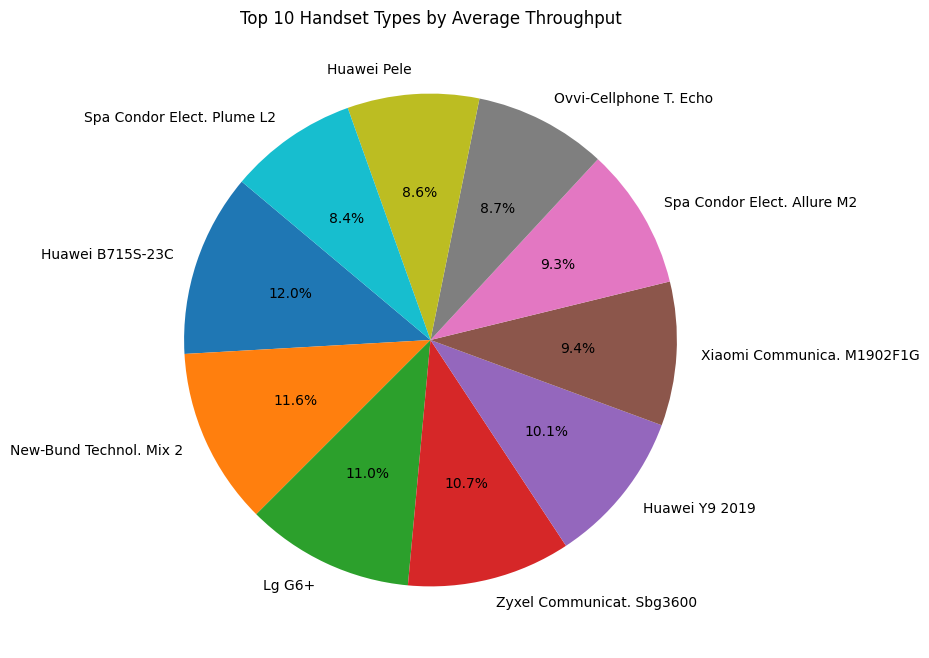

In [53]:
# Assuming top_10_throughput_per_handset is a Series with the handset types as the index and the average throughput as the values
labels = top_10_throughput_per_handset.index
sizes = top_10_throughput_per_handset.values

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional, adjust as needed)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Top 10 Handset Types by Average Throughput')

# Display the plot
plt.show()

## e. The average TCP retransmission view per handset

In [54]:
TCP_per_handset =  dd['Avg_TCP_Retransmission'].groupby(dd['Handset Type']).mean()
TCP_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809             NaN
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [55]:
TCP_per_handset = dd['Avg_TCP_Retransmission'].fillna(dd['Avg_TCP_Retransmission'].mean()).groupby(dd['Handset Type']).mean()
TCP_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                             1.285848e+07
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.285848e+07
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [56]:
top_10_TCP_per_handset = TCP_per_handset.sort_values(ascending=False).head(10)
print(top_10_TCP_per_handset)

Handset Type
Huawei Bln-Al10                              1.645873e+08
Asustek Asus Zenfone Selfie Zd551Kl          1.608292e+08
Samsung Galaxy Tab S3 (Sm-T825)              1.038853e+08
Huawei E5776S-32                             8.611504e+07
Apple iPad Pro (A1652)                       6.917633e+07
Samsung Galaxy J8 2018                       5.787917e+07
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    5.329110e+07
Xiaomi Communica. Mi 6                       3.769354e+07
Huawei E5573                                 3.493472e+07
Huawei Y7 Prime 2018                         3.265211e+07
Name: Avg_TCP_Retransmission, dtype: float64


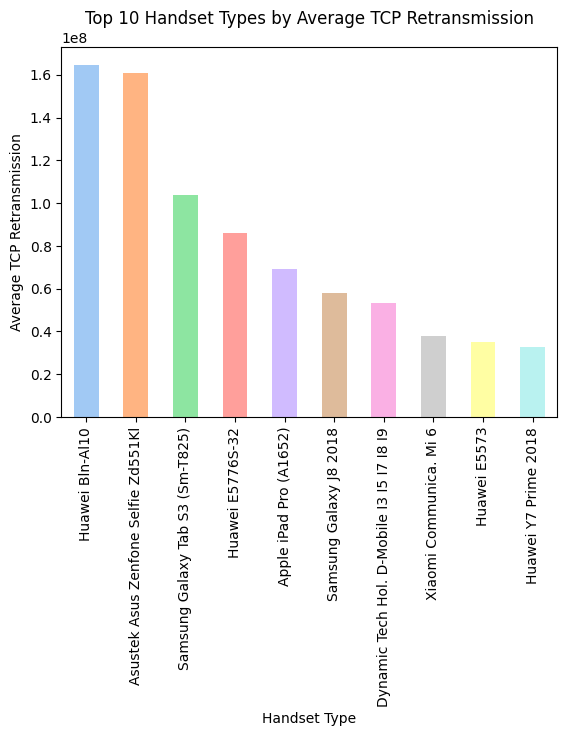

In [57]:
# Create a bar plot with custom colors
colors = sns.color_palette('pastel')
top_10_TCP_per_handset.plot(kind='bar', color=colors)


# Add axis labels and a title
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Top 10 Handset Types by Average TCP Retransmission')

plt.show()

# Task 3.4

### Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [59]:
dd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,NaN,23.5,33.5
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,NaN,35.0,21.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,NaN,NaN,7.5
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,NaN,NaN,44.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,NaN,NaN,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,NaN,16.0,58.5
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,NaN,14.5,38.5
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,NaN,24.5,45.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,NaN,21.0,35.5


In [61]:
dd.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [63]:
for i in dd.columns:
    if dd[i].dtypes=="object":
        dd[i].fillna(dd[i].mode()[0],inplace=True)
    else:
        dd[i].fillna(dd[i].mean(),inplace=True)

In [64]:
dd.fillna(dd[['Avg_TCP_Retransmission','Avg_RTT','Avg_Throughput' ]].mean(), inplace=True)

dd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,13114483460844900352,2019-04-04 12:01:18.000000000,770.0000,2019-04-25 14:35:31.000000000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,1.285848e+07,23.500000,33.500000
1,13114483482878900224,2019-04-09 13:04:04.000000000,235.0000,2019-04-25 08:15:48.000000000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,1.285848e+07,35.000000,21.000000
2,13114483484080500736,2019-04-09 17:42:11.000000000,1.0000,2019-04-25 11:58:13.000000000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,1.285848e+07,63.512443,7.500000
3,13114483485442799616,2019-04-10 00:31:25.000000000,486.0000,2019-04-25 07:36:35.000000000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,1.285848e+07,63.512443,44.000000
4,13114483499480700928,2019-04-12 20:10:23.000000000,565.0000,2019-04-25 10:40:32.000000000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,1.285848e+07,63.512443,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,1.285848e+07,16.000000,58.500000
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,1.285848e+07,14.500000,38.500000
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,1.285848e+07,24.500000,45.000000
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,1.285848e+07,21.000000,35.500000


In [66]:
dd.isnull().sum().sum()

0

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select the relevant experience metrics for clustering
experience_metrics = dd[['Avg_Throughput', 'Avg_RTT', 'Avg_TCP_Retransmission']]

# Perform scaling or normalization 
scaler = MinMaxScaler()
experience_metrics = pd.DataFrame(scaler.fit_transform(dd[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]), columns=['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput'], index=dd.index)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(experience_metrics)

# Get the cluster labels for each user
dd['cluster'] = kmeans.labels_
dd['cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: cluster, Length: 150001, dtype: int32

In [69]:
# Group the DataFrame by the 'cluster' column
cluster_groups = dd.groupby('cluster')

# Iterate through each cluster and describe its characteristics
for i, cluster_dd in cluster_groups:
    print(f'\nCluster {i}:')
    print(f'  Size: {len(cluster_dd)}')
    print(f'  Average TCP Retransmission: {cluster_dd["Avg_TCP_Retransmission"].mean()}')
    print(f'  Average RTT: {cluster_dd["Avg_RTT"].mean()}')
    print(f'  Average Throughput: {cluster_dd["Avg_Throughput"].mean()}')


Cluster 0:
  Size: 111688
  Average TCP Retransmission: 11485846.924425758
  Average RTT: 65.94495180729824
  Average Throughput: 1053.950883150264

Cluster 1:
  Size: 8293
  Average TCP Retransmission: 46600815.336276375
  Average RTT: 48.67002441126206
  Average Throughput: 47983.35608344387

Cluster 2:
  Size: 30020
  Average TCP Retransmission: 8644020.680663029
  Average RTT: 58.56261199145124
  Average Throughput: 20474.799800133245


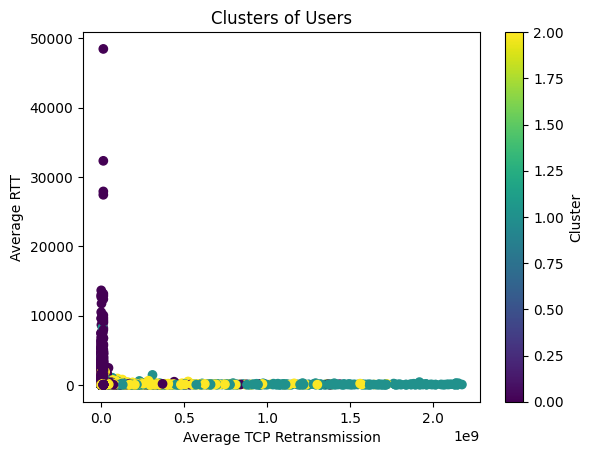

In [70]:
import matplotlib.pyplot as plt

# Scatter plot of TCP Retransmission vs RTT
plt.scatter(dd['Avg_TCP_Retransmission'], dd['Avg_RTT'], c=dd['cluster'], cmap='viridis')

# Add labels and a title
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Average RTT')
plt.title('Clusters of Users')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()

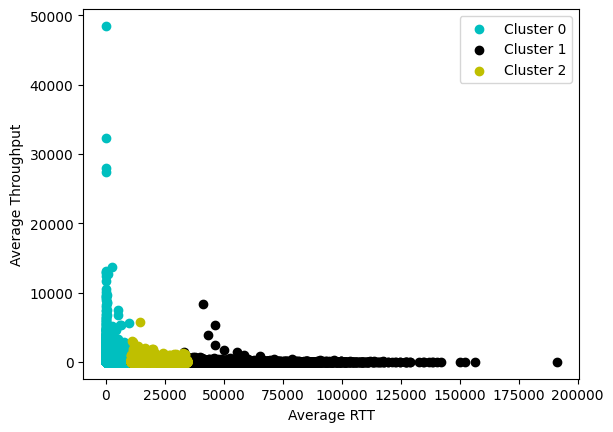

In [71]:
fig, ax = plt.subplots()

colors = ['c', 'k', 'y']

for i in range(3):
    cluster_dd = dd[dd['cluster'] == i]
    x = cluster_dd['Avg_Throughput']
    y = cluster_dd['Avg_RTT']
    ax.scatter(x, y, c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Average RTT')
ax.set_ylabel('Average Throughput')
ax.legend()

plt.show()